#### Import necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

#### Read the csv file into a pandas dataframe

In [2]:
df_with_target = pd.read_csv('data/application_train.csv')
df_with_target.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### Drop the TARGET and SK_ID_CURR

In [3]:
target = df_with_target['TARGET']
df_without_target = df_with_target.drop(['TARGET', 'SK_ID_CURR'], axis=1)
df_without_target.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### Seperate into Categorical and Numerical features

In [4]:
df_without_target.dtypes.unique().tolist()

[dtype('O'), dtype('int64'), dtype('float64')]

In [5]:
numerical_features = df_without_target.select_dtypes(include=['float64', 'int64'])
numerical_features.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
categorical_features = df_without_target.select_dtypes(include=['object'])
categorical_features.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN


#### Find missing values as a percentage in each column and remove unnecessary data

In [7]:
num_cols = []
cat_cols = []

# categorical features > 50% nulls
print("---categorical features > 50% nulls---")
for col in categorical_features.columns:
    missing_percentage = categorical_features[col].isna().sum()/categorical_features.shape[0]*100

    # adjest this as you want
    if missing_percentage > 50:
        print(col, missing_percentage)
        cat_cols.append(col)

print()

# numerical features > 50% nulls
print("---numerical features > 50% nulls---")
for col in numerical_features.columns:
    missing_percentage = numerical_features[col].isna().sum()/numerical_features.shape[0]*100

    # adjest this as you want
    if missing_percentage > 50:
        print(col, missing_percentage)
        num_cols.append(col)

print()

print(cat_cols)
print(num_cols)

categorical_features.drop(cat_cols, axis=1, inplace=True)
numerical_features.drop(num_cols, axis=1, inplace=True)

---categorical features > 50% nulls---
FONDKAPREMONT_MODE 68.38617155158677
HOUSETYPE_MODE 50.176091261776
WALLSMATERIAL_MODE 50.8407829313423

---numerical features > 50% nulls---
OWN_CAR_AGE 65.9908100848425
EXT_SOURCE_1 56.381072546998325
APARTMENTS_AVG 50.74972927797705
BASEMENTAREA_AVG 58.51595552679416
YEARS_BUILD_AVG 66.49778381911543
COMMONAREA_AVG 69.87229725115525
ELEVATORS_AVG 53.29597965601231
ENTRANCES_AVG 50.3487680115508
FLOORSMIN_AVG 67.84862980511267
LANDAREA_AVG 59.376737742714894
LIVINGAPARTMENTS_AVG 68.35495315614726
LIVINGAREA_AVG 50.193326417591564
NONLIVINGAPARTMENTS_AVG 69.43296337366793
NONLIVINGAREA_AVG 55.17916432257708
APARTMENTS_MODE 50.74972927797705
BASEMENTAREA_MODE 58.51595552679416
YEARS_BUILD_MODE 66.49778381911543
COMMONAREA_MODE 69.87229725115525
ELEVATORS_MODE 53.29597965601231
ENTRANCES_MODE 50.3487680115508
FLOORSMIN_MODE 67.84862980511267
LANDAREA_MODE 59.376737742714894
LIVINGAPARTMENTS_MODE 68.35495315614726
LIVINGAREA_MODE 50.193326417591564


#### Take the percentage counts of unique values in both numerical and categorical features

In [8]:
num_cols = []
cat_cols = []

# categorical features > 90% uniques
print("---categorical features > 90% uniques---")
for col in categorical_features.columns:
    unique_percentage = categorical_features[col].value_counts().max()/categorical_features.shape[0]*100

    # adjest this as you want
    if unique_percentage > 95:
        print(col, unique_percentage)
        cat_cols.append(col)

print()

# numerical features > 90% uniques
print("---numerical features > 90% uniques---")
for col in numerical_features.columns:
    unique_percentage = numerical_features[col].value_counts().max()/numerical_features.shape[0]*100

    # adjest this as you want
    if unique_percentage > 95:
        print(col, unique_percentage)
        num_cols.append(col)

print(cat_cols)
print(num_cols)

categorical_features.drop(cat_cols, axis=1, inplace=True)
numerical_features.drop(num_cols, axis=1, inplace=True)

---categorical features > 90% uniques---

---numerical features > 90% uniques---
FLAG_MOBIL 99.99967480838083
FLAG_CONT_MOBILE 99.81334001060125
REG_REGION_NOT_LIVE_REGION 98.48558262956448
LIVE_REGION_NOT_WORK_REGION 95.93412918562262
FLAG_DOCUMENT_2 99.99577250895089
FLAG_DOCUMENT_4 99.99187020952095
FLAG_DOCUMENT_5 98.48850935413692
FLAG_DOCUMENT_7 99.98081369446946
FLAG_DOCUMENT_9 99.61042044024441
FLAG_DOCUMENT_10 99.99772365866588
FLAG_DOCUMENT_11 99.60879448214861
FLAG_DOCUMENT_12 99.99934961676168
FLAG_DOCUMENT_13 99.64749228482883
FLAG_DOCUMENT_14 99.70635196789709
FLAG_DOCUMENT_15 99.87902871767189
FLAG_DOCUMENT_16 99.00718998669966
FLAG_DOCUMENT_17 99.97333428722875
FLAG_DOCUMENT_18 99.18702095209603
FLAG_DOCUMENT_19 99.94048993369343
FLAG_DOCUMENT_20 99.9492701074108
FLAG_DOCUMENT_21 99.96650526322635
[]
['FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'REG_REGION_NOT_LIVE_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_7', 

#### Concatenate final result

In [9]:
df_col_cleaned = pd.concat([categorical_features, numerical_features, target], axis=1)
df_col_cleaned.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,...,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,...,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,...,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,...,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,...,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0


#### No need to remove rows which has nulls for each feature

In [10]:
df_col_cleaned.isna().sum(axis=1).max()

20

#### Final row & columns cleaned by removing inappropriate columns and rows

In [11]:
df_row_col_cleaned = df_col_cleaned
df_row_col_cleaned.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,...,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,...,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,...,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,...,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,...,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0


#### Correlation Matrix

<Axes: >

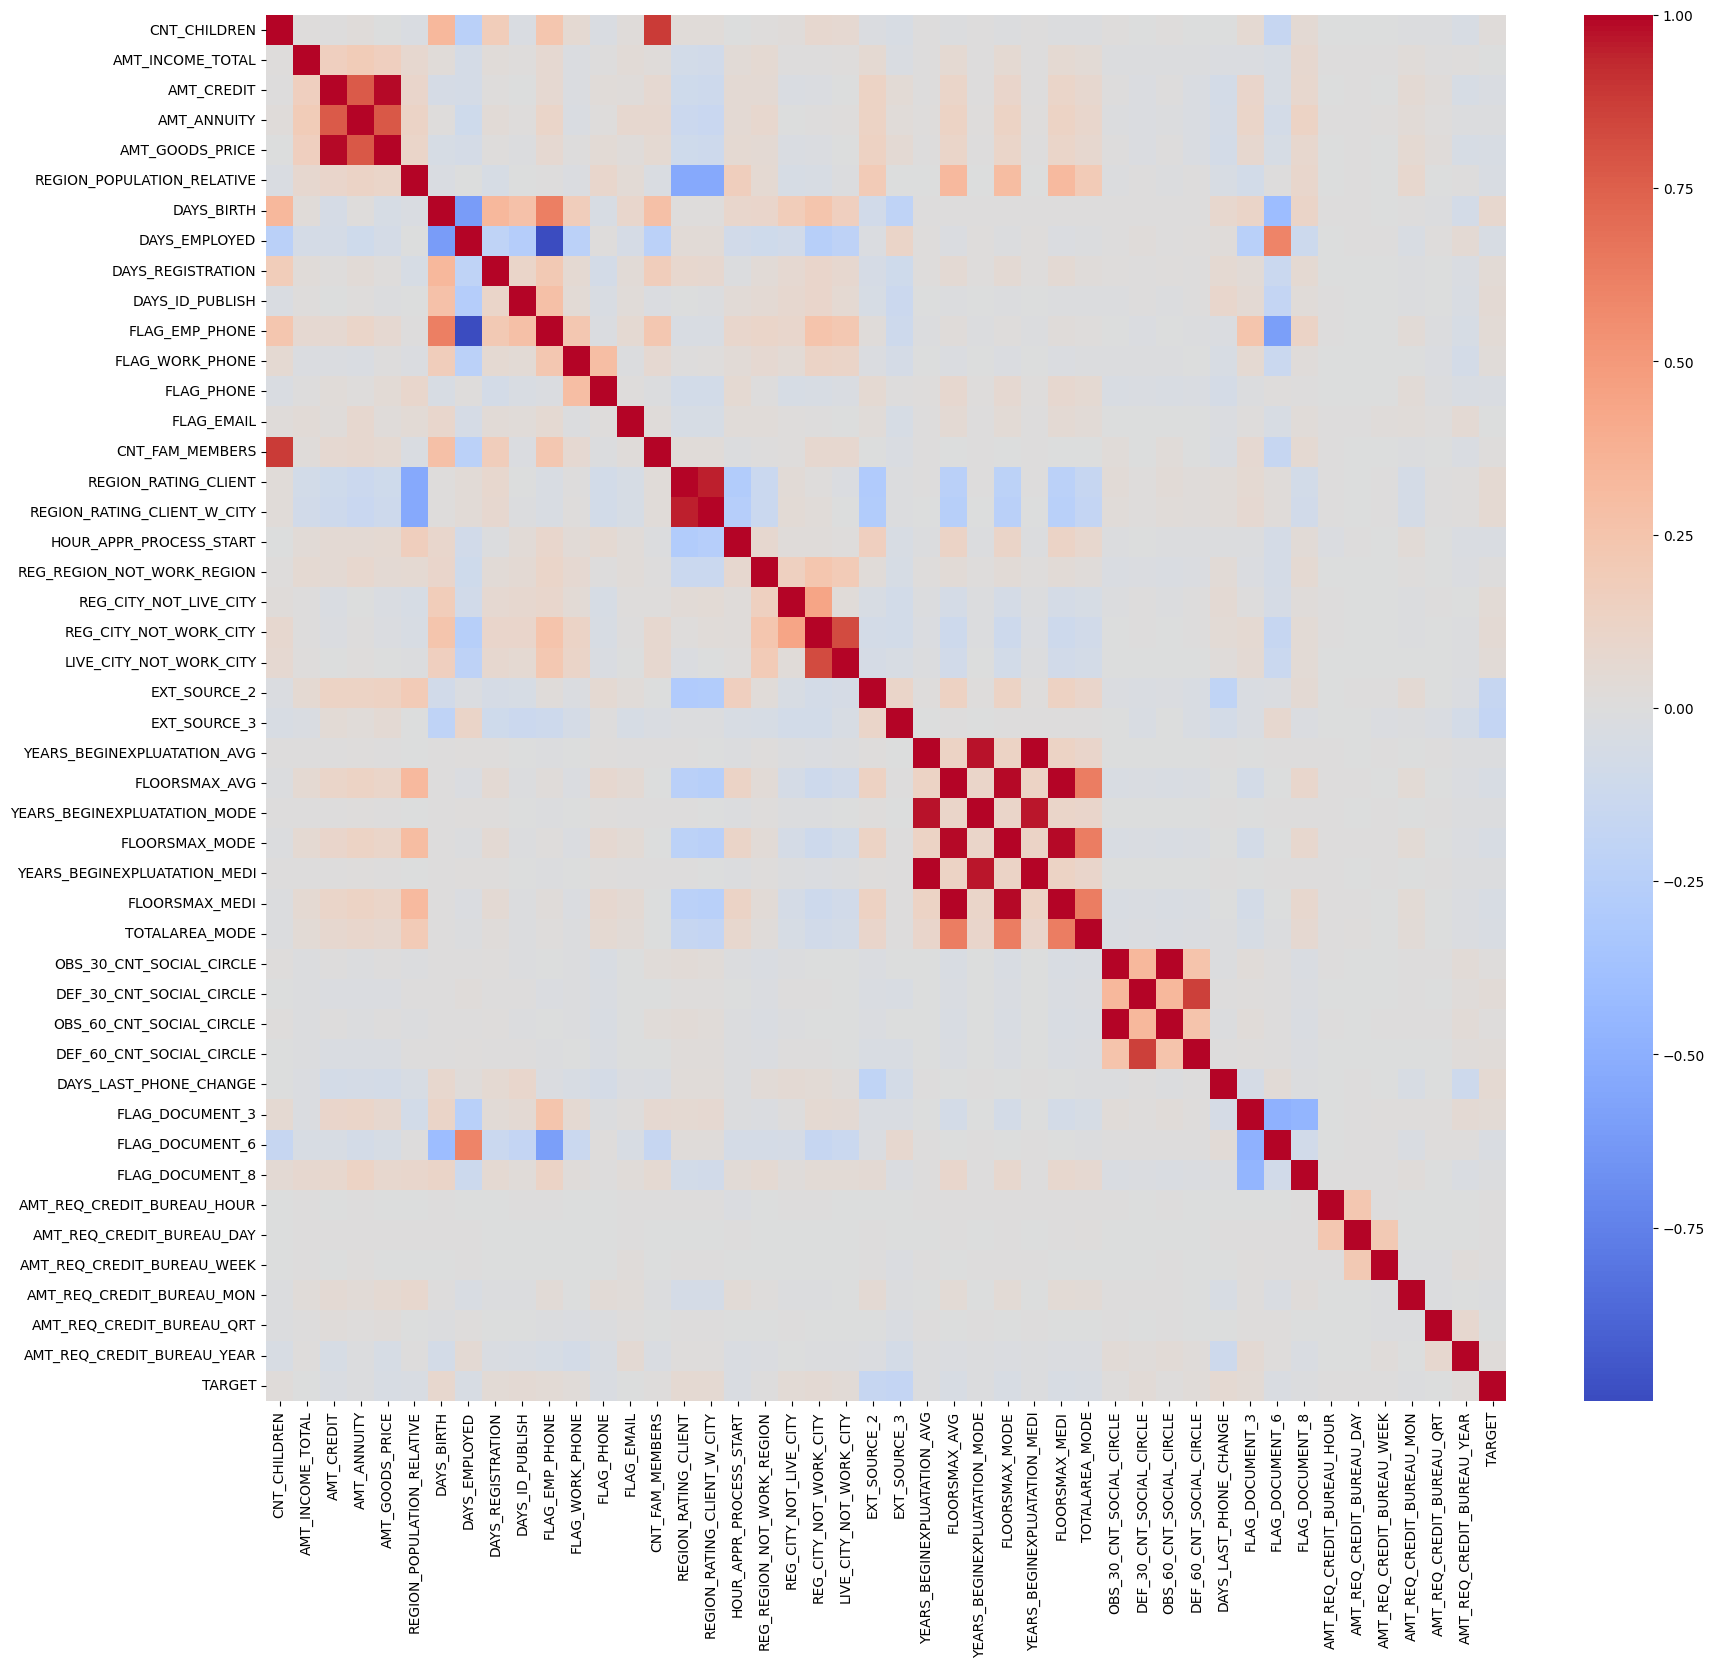

In [12]:
import seaborn as sns

numerical_data = df_row_col_cleaned.select_dtypes(include=['float64', 'int64'])
df = numerical_data.drop("TARGET", axis=1)
corrilation_matrix = numerical_data.corr()
plt.figure(figsize=(20, 18))
sns.heatmap(corrilation_matrix, annot=False, cmap='coolwarm', center=0)

#### Use Correlations and Drop some features based on correlations

In [13]:
df_correlation_removed = df_row_col_cleaned

#### Test Train Split

In [14]:
X = df_correlation_removed.drop('TARGET', axis=1)
y = df_correlation_removed['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(276759, 58)
(30752, 58)
(276759,)
(30752,)


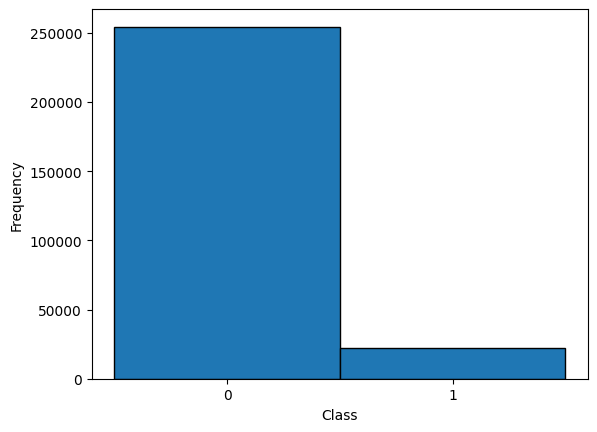

In [15]:
plt.hist(y_train, bins=[-0.5, 0.5, 1.5], edgecolor='black', align='mid')
plt.xticks([0, 1])
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

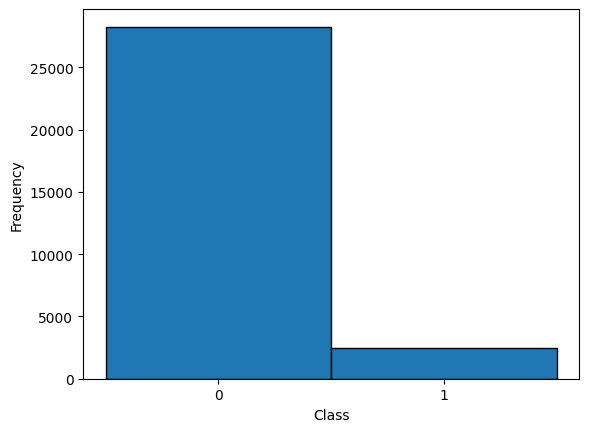

In [16]:
plt.hist(y_test, bins=[-0.5, 0.5, 1.5], edgecolor='black', align='mid')
plt.xticks([0, 1])
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

#### Apply Imputation Techniques

##### Median Imputing

In [17]:
from sklearn.impute import SimpleImputer

mode_imputer = SimpleImputer(strategy='most_frequent')
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
X_train[categorical_features] = mode_imputer.fit_transform(X_train[categorical_features])
X_test[categorical_features] = mode_imputer.transform(X_test[categorical_features])

##### Mean Imputing

In [18]:
from sklearn.impute import SimpleImputer

mode_imputer = SimpleImputer(strategy='mean')
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
X_train[numerical_features] = mode_imputer.fit_transform(X_train[numerical_features])
X_test[numerical_features] = mode_imputer.transform(X_test[numerical_features])

#### Encoding

##### Replacing with 1s and 0s

From Pandas Profiling Report I have found following features can be replaced with binary 0s and 1s

In [19]:
def encode_bin(X):
    pd.set_option("future.no_silent_downcasting", True)
    
    X['FLAG_OWN_CAR'] = X['FLAG_OWN_CAR'].replace({'Y': 1, 'N': 0})
    X['FLAG_OWN_CAR'] = X['FLAG_OWN_CAR'].astype('float64')
    # print(X['FLAG_OWN_CAR'].head(3))
    
    X['FLAG_OWN_REALTY'] = X['FLAG_OWN_REALTY'].replace({'Y': 1, 'N': 0}) 
    X['FLAG_OWN_REALTY'] = X['FLAG_OWN_REALTY'].astype('float64')
    # print(X['FLAG_OWN_REALTY'].head(3))
    
    X['EMERGENCYSTATE_MODE'] = X['EMERGENCYSTATE_MODE'].replace({'Yes': 1, 'No': 0})
    X['EMERGENCYSTATE_MODE'] = X['EMERGENCYSTATE_MODE'].astype('float64')
    # print(X_train['EMERGENCYSTATE_MODE'].head(3))
    return X

In [20]:
X_train = encode_bin(X_train)
X_test = encode_bin(X_test)

##### one-hot encoding

In [21]:
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

In [22]:
ohe = OneHotEncoder()
encodded = ohe.fit_transform(X_train[categorical_features])

X_encd = encodded.toarray()
X_train = X_train.drop(categorical_features, axis=1)
X_train = np.array(X_train)

X_train = np.append(X_train, X_encd, axis=1)

In [23]:
X_train.shape

(276759, 168)

In [24]:
encodded = ohe.transform(X_test[categorical_features])

y_encd = encodded.toarray()
X_test = X_test.drop(categorical_features, axis=1)
X_test = np.array(X_test)

X_test = np.append(X_test, y_encd, axis=1)

In [25]:
X_test.shape

(30752, 168)

#### Over/Under sampling

In [26]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=42)
X_train, y_train = smote_enn.fit_resample(X_train, y_train)

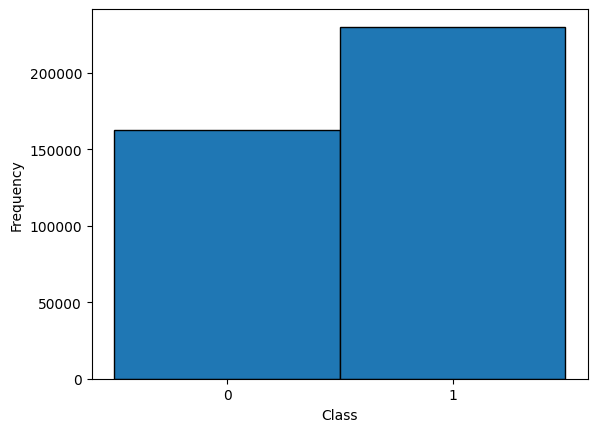

In [27]:
plt.hist(y_train, bins=[-0.5, 0.5, 1.5], edgecolor='black', align='mid')
plt.xticks([0, 1])
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

#### Training XGBoost Classifier Model

In [28]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Prepare data
X_train_selected = np.array(X_train)
X_test_selected = np.array(X_test)

stdscl = StandardScaler()
X_train_selected = stdscl.fit_transform(X_train_selected)
X_test_selected = stdscl.transform(X_test_selected)

print(y_train.value_counts())

# Train XGBoost classifier
model = xgb.XGBClassifier()
model.fit(X_train_selected, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_selected)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

TARGET
1    230198
0    162596
Name: count, dtype: int64
[[27682   587]
 [ 2166   317]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     28269
           1       0.35      0.13      0.19      2483

    accuracy                           0.91     30752
   macro avg       0.64      0.55      0.57     30752
weighted avg       0.88      0.91      0.89     30752



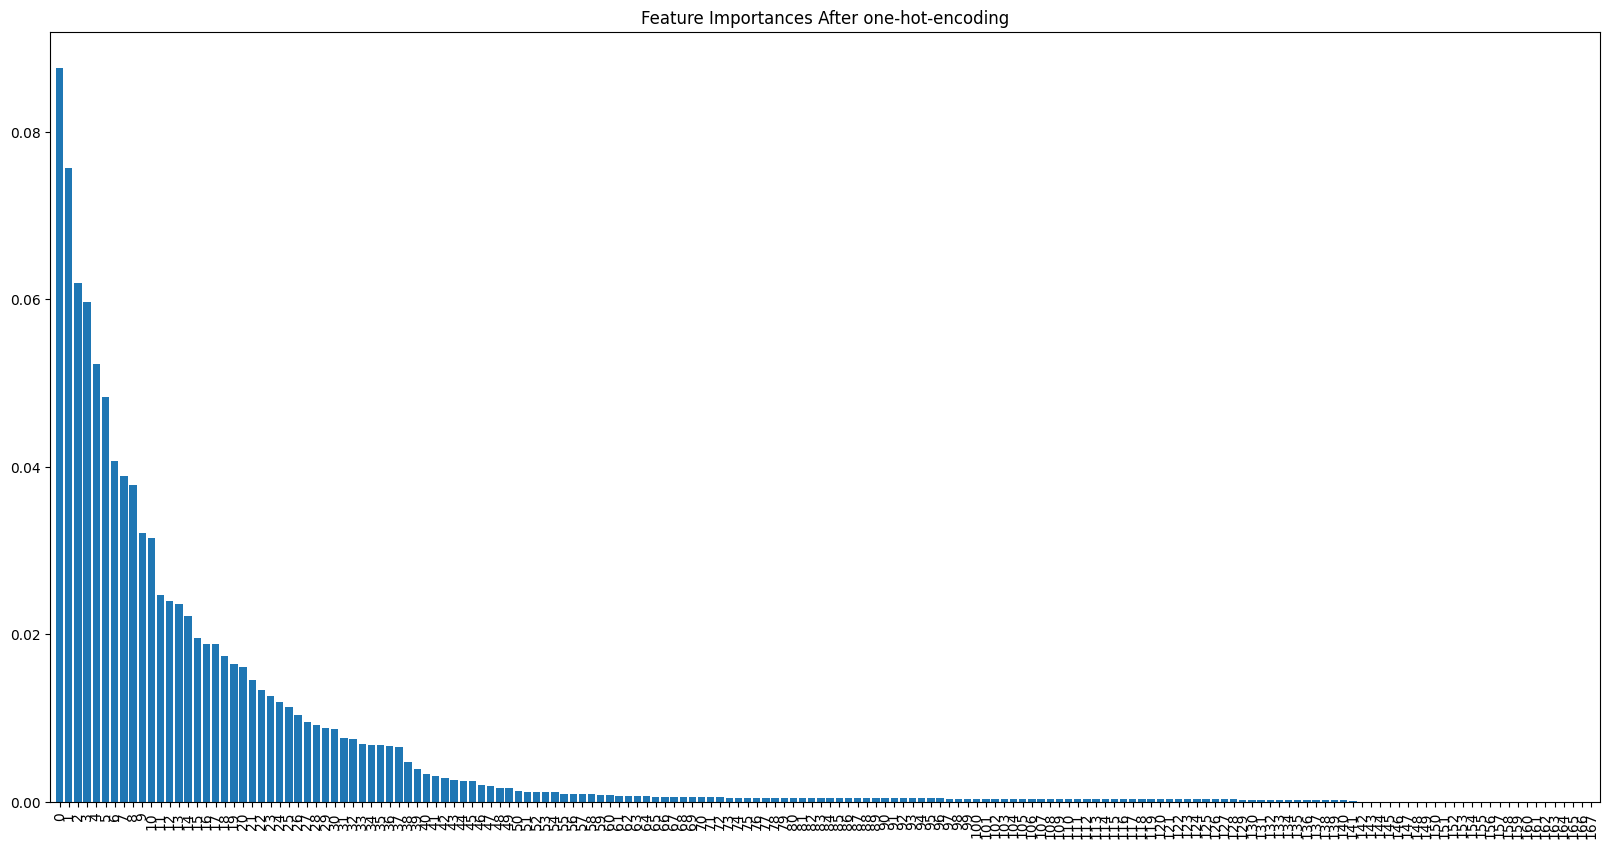

In [36]:
# feature_names = df_correlation_removed.columns
# Get feature importances
importances = model.feature_importances_
# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]
# Plot the feature importances
plt.figure(figsize=(20, 10))
plt.title("Feature Importances After one-hot-encoding")
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()